In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from progressbar import progressbar as pbar
from scipy import stats
from local.lib import histos2d as h2
%matplotlib inline

# 1. Testing for discovery, $H_0 \rightarrow \mu=0$

if we can reject the NULL hypothesis $H_0$ this means that there has been a discovery

## First, we set up the NULL hypothesis

obtain a distribution of the $t_s$ given this $H_0$, and compute the $p_{value}$ of our data according to this $\mu$

In [2]:
alpha=0.05
t, mu_s, sigma_s, real_mu = 0.03, 80, 6, 0
n_events = 5000 # number of events per experiment

n_experiments = 4000 # number of experiments (each one with n_events) for empirical distributions

m_H0 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, real_mu])
m_H0.build_ts_distribution(n_events=n_events, n_experiments=4000, show_pbar=False)

## Then, we simulate we observed data with some $\mu$

plot the data obtained experimentally (simulated) against the $pdf$ of the NULL hypothesis.

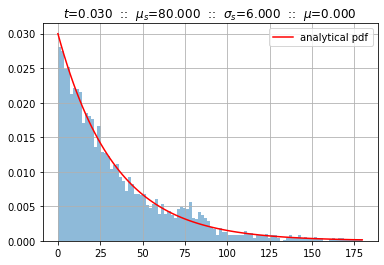

In [6]:
test_mu = .03
m_H1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu])
x1 = m_H1.rvs(n_events)
m_H0.plot_sample(x1, bins=100)

In [22]:
dlk = [m_H0.neg_likelihood(h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu]).rvs(n_events)).numpy()  for _ in pbar(range(1000))]

100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


DISCOVERY!!! reject H0


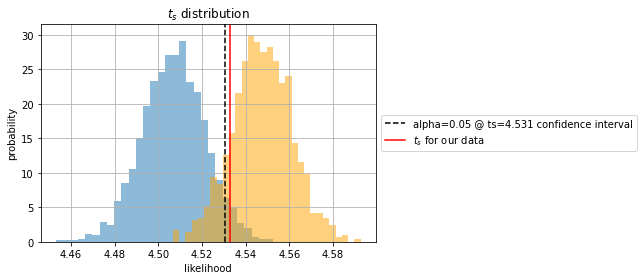

In [25]:
if m_H0.get_pvalue(x1)<.05:
    print ("DISCOVERY!!! reject H0")
else:
    print ("failed to reject H0, cannot confirm discovery")
m_H0.plot_ts_distribution(ts_val=m_H0.neg_likelihood(x1))
plt.hist(dlk, bins=30, density=True, alpha=.5, color="orange");

In [29]:
p_val_min = np.percentile(m_H0.ts, 95)

In [31]:
np.mean(np.r_[dlk]>p_val_min) # statistical power

0.896

DISCOVERY!!! reject H0


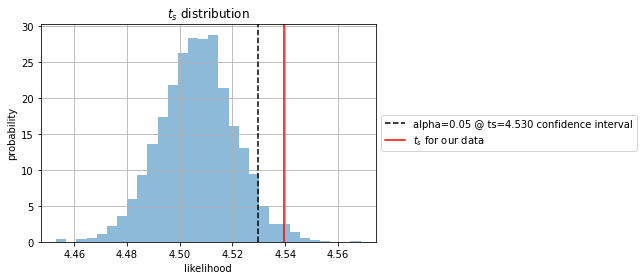

In [59]:
if m_H0.get_pvalue(x1)<.05:
    print ("DISCOVERY!!! reject H0")
else:
    print ("failed to reject H0, cannot confirm discovery")
m_H0.plot_ts_distribution(ts_val=m_H0.neg_likelihood(x1))

can ask: **what is the min $\mu$ with which I can reject $H_0$ at 90% probability** (statistical power)

1. choose a value for $\mu$
2. simulate many $H_1$ experiments with this $\mu$
3. compute the $p_{value}$ for each experiment
4. measure how many times that $p_{value}$ would reject $H_0$

In [58]:
test_mus = np.linspace(0,.1,10)
power = []
for test_mu in test_mus:
    m_H1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu])
    pvals = np.r_[[m_H0.get_pvalue(m_H1.rvs(n_events)) for _ in pbar(range(1000))]]
    power.append(np.mean(pvals<0.05))

100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


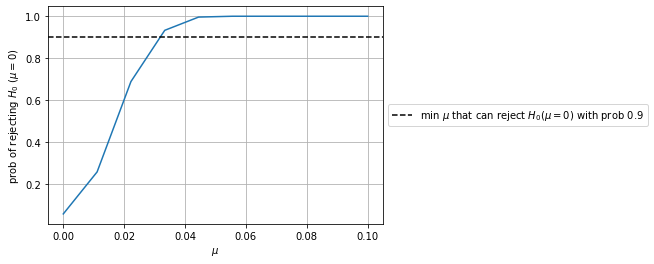

In [87]:
plt.plot(test_mus, power)
plt.grid();
plt.xlabel("$\mu$")
plt.ylabel("prob of rejecting $H_0$ ($\mu=0$)")
plt.axhline(0.9, label="min $\mu$ that can reject $H_0 (\mu=0)$ with prob 0.9", color="black", ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# 2. Testing for limits $H_0 \rightarrow \mu=k$ (some value), $H_1 \rightarrow \mu=0$

setup $H_0$

In [88]:
alpha=0.05
t, mu_s, sigma_s, real_mu = 0.03, 80, 6, 0.1
n_events = 5000 # number of events per experiment

n_experiments = 4000 # number of experiments (each one with n_events) for empirical distributions

m_H0 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, real_mu])
m_H0.build_ts_distribution(n_events=n_events, n_experiments=4000, show_pbar=False)

an observation from $H_1$, with its $p_{value}$

p_value of the observation 1.0000


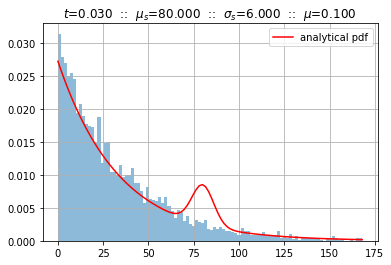

In [63]:
test_mu = .0
m_H1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu])
x1 = m_H1.rvs(n_events)
m_H0.plot_sample(x1, bins=100)
print ("p_value of the observation %.4f"%m_H0.get_pvalue(x1))

4.565310760960709

left p_value: 0.0


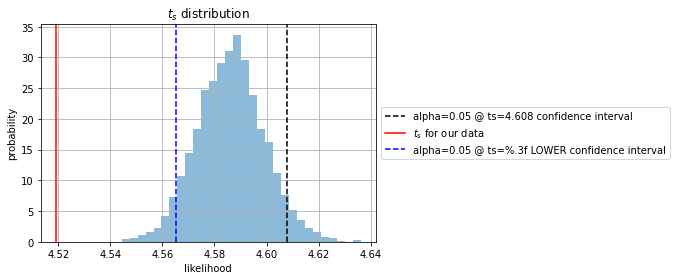

In [73]:
m_H0.plot_ts_distribution(ts_val=m_H0.neg_likelihood(x1))
lmax = np.percentile(m_H0.ts,5)
plt.axvline(lmax, ls="--", color="blue", label="alpha=0.05 @ ts=%.3f LOWER confidence interval")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
print ("left p_value:", 1-m_H0.get_pvalue(x1))

can ask: **what is the maximum $\mu$ which CANNOT be rejected with data from $H_1$ ($\mu=0$)**

1. chose a value for $\mu$
2. compute the sampling distribution for the test statistic for that $\mu$ in $H_0$
3. simulate many $H_1$ experiments with $\mu=0$
4. measure how many times the LEFT p_value rejects H0

In [106]:
mus_H0 = np.linspace(0,0.3,20)


In [107]:
prob_reject_H0 = []

for mu_H0 in mus_H0:
    m_H0 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, mu_H0])
    m_H0.build_ts_distribution(n_events=n_events, n_experiments=4000, show_pbar=False)

    mu_H1 = .0
    m_H1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu])
    pvals = np.r_[[m_H0.get_pvalue(m_H1.rvs(n_events)) for _ in pbar(range(1000))]]
    prob_reject_H0.append(np.mean((1-pvals)<.05))

prob_reject_H0 = np.r_[prob_reje
                       ct_H0]


100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (1000 of 1000) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (1000 of 1000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (1000 of 1000) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (1000 of 1000) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (1000 of 1000) |###################

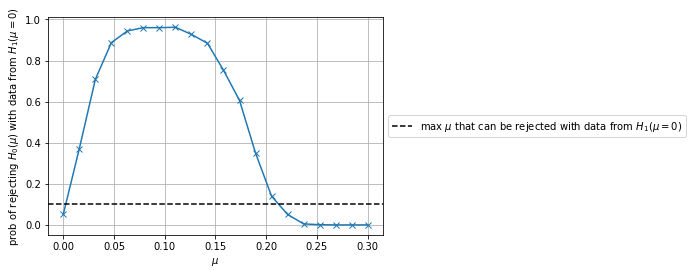

In [108]:
plt.plot(mus_H0, prob_reject_H0, marker="x")
plt.grid();
plt.xlabel("$\mu$")
plt.ylabel("prob of rejecting $H_0 (\mu)$ with data from $H_1 (\mu=0)$")
plt.axhline(0.1, color="black", ls="--", label="max $\mu$ that can be rejected with data from $H_1 (\mu=0)$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [109]:
mus_H0[np.argwhere(prob_reject_H0>0.1)[:,0][-1]]

0.20526315789473684

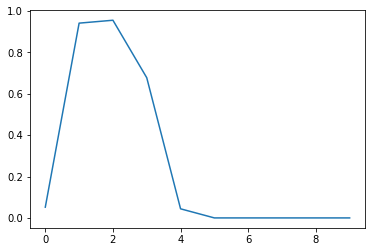

In [102]:
plt.plot(prob_reject_H0)